In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

gen_inputs = np.column_stack((xs,zs))
print(gen_inputs.shape)
noise = np.random.uniform(-1,1,(observations,1))

gen_targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro',inputs = gen_inputs,targets = gen_targets)

(1000, 2)


In [6]:
training_data = np.load('TF_intro.npz')
inpuut_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,kernel_initializer = tf.random_uniform_initializer(-0.1,0.1),bias_initializer = tf.random_uniform_initializer(-0.1,0.1))])

custom_optimizer = tf.keras.optimizers.SGD(0.02)
model.compile(optimizer=custom_optimizer, loss= 'mean_squared_error')
#model.compile(optimizer='sgd', loss= 'mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=150,verbose=1)

Epoch 1/150
32/32 [==============================] - 0s 610us/step - loss: 24.4064
Epoch 2/150
32/32 [==============================] - 0s 530us/step - loss: 1.3048
Epoch 3/150
32/32 [==============================] - 0s 1ms/step - loss: 0.4237
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.3751
Epoch 5/150
32/32 [==============================] - 0s 843us/step - loss: 0.3783
Epoch 6/150
32/32 [==============================] - 0s 623us/step - loss: 0.3767
Epoch 7/150
32/32 [==============================] - 0s 782us/step - loss: 0.4045
Epoch 8/150
32/32 [==============================] - 0s 530us/step - loss: 0.3731
Epoch 9/150
32/32 [==============================] - 0s 806us/step - loss: 0.3886
Epoch 10/150
32/32 [==============================] - 0s 621us/step - loss: 0.3717
Epoch 11/150
32/32 [==============================] - 0s 980us/step - loss: 0.3875
Epoch 12/150
32/32 [==============================] - 0s 752us/step - loss: 0.3820
Epoch 13/150
32/

[array([[ 2.0334432],
       [-2.9798894]], dtype=float32), array([4.9736047], dtype=float32)]


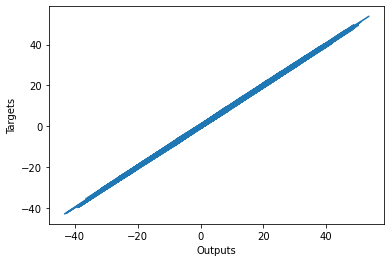

In [5]:
print(model.layers[0].get_weights())
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()